failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'


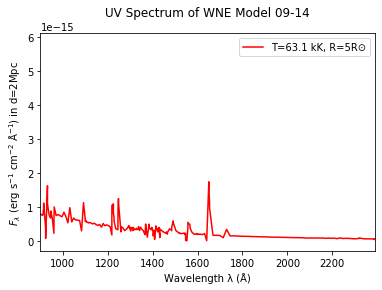

name      = lmc-wne_09-14_sed.txt
x         = Float64[1795]
y         = Float64[1795]
staterror = None
syserror  = None
y-mean:
5.203253808074407e-16
y range:
5.827965989457039e-15


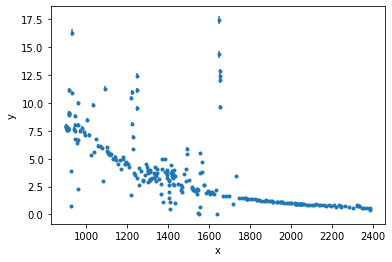

In [1]:
%matplotlib inline
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import sherpa.ui as ui
from astropy.io import fits

#UV data for 09-14
data = loadtxt('lmc-wne_09-14_sed.txt')
x = data[:,0]
y = data[:,1]
flux=(10**y)
F = (2.5e-11*flux)
wlen = (10**x)

#UV plot
plt.plot(wlen, F, color='r',label= 'T=63.1 kK, R=5R\u2299')
plt.xlim(900,2391)
plt.legend()

#axes and labels
plt.title('UV Spectrum of WNE Model 09-14',y=1.05)
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('$F_\u03BB$ (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$) in d=2Mpc ')
plt.show()

#Data using sherpa
ui.load_data('lmc-wne_09-14_sed.txt')
print(ui.get_data())
x2 = ui.get_data().x
y2 = ui.get_data().y
wavelength = 10**x2
y2linear = 10**y2
flux2 = 2.5e-11*y2linear

(ui.get_data().x)
(ui.get_data().y)

#plotting with sherpa
ui.load_arrays(1, wavelength, flux2)
print('y-mean:')
print(ui.get_data().y.mean())
print('y range:')
print(np.ptp(ui.get_data().y))

#rescaling data
d1 = ui.get_data()
d1.y *= 1e16

#setting errors
d1.staterror == None
True
ui.set_staterror(0.02, fractional=True)
d1.staterror == None
False

#filtering data and plotting
ui.notice(900, 2391)
ui.plot_data()


polynomial statistics:
polynom1d.poly
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   poly.c0      thawed      33.7682 -3.40282e+38  3.40282e+38           
   poly.c1      thawed   -0.0499106 -3.40282e+38  3.40282e+38           
   poly.c2      thawed  2.05223e-05 -3.40282e+38  3.40282e+38           
   poly.c3      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c4      thawed -9.56615e-13 -3.40282e+38  3.40282e+38           
   poly.c5      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c6      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c7      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c8      frozen            0 -3.40282e+38  3.40282e+38           
   poly.offset  frozen            0 -3.40282e+38  3.40282e+38           
stat names:
chi2gehrels
ui.fit statistics:
Dataset               = 1
Method           

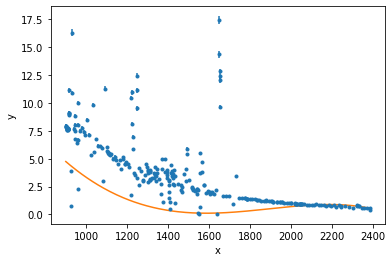

In [7]:
#plotting with sherpa
ui.load_arrays(1, wavelength, flux2)

#rescaling data
d1 = ui.get_data()
d1.y *= 1e16

#errors
d1.staterror == None
True
ui.set_staterror(0.02, fractional=True)
d1.staterror == None
False

#filtering data and plotting
ui.notice(900, 2391)
ui.plot_data()

#"fitting" continuum 
print("polynomial statistics:")
ui.set_source(ui.polynom1d.poly)
print(poly)
ui.thaw(poly.c1, poly.c2, poly.c4)
poly.c3 = 0
ui.freeze(poly.c3)

#checking statistic
print('stat names:')
print(ui.get_stat_name())
print('ui.fit statistics:')
ui.fit()
ui.plot_fit()

#fit results
print('fit results:')
results = ui.get_fit_results()
print(results)


gaussian fit statistics
Dataset               = 1
Method                = levmar
Statistic             = chi2
Initial fit statistic = 374993
Final fit statistic   = 343815 at function evaluation 1370
Data points           = 275
Degrees of freedom    = 250
Probability [Q-value] = 0
Reduced statistic     = 1375.26
Change in statistic   = 31178.4
   poly.c0        33.742       +/- 0           
   poly.c1        -0.049911    +/- 0           
   poly.c2        2.05374e-05  +/- 0           
   poly.c4        -9.58529e-13 +/- 6.98713e-17 
   g1.fwhm        10.6291      +/- 0           
   g1.pos         907.697      +/- 0           
   g1.ampl        3.88534      +/- 0           
   g2.fwhm        2.28653      +/- 0           
   g2.pos         1049.77      +/- 0           
   g2.ampl        8.37683      +/- 0           
   g3.fwhm        2.24364      +/- 0           
   g3.pos         1200.16      +/- 0           
   g3.ampl        163.601      +/- 0           
   g4.fwhm        5.06513     

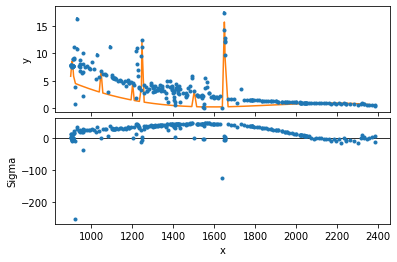

In [8]:
#plotting with sherpa
ui.load_arrays(1, wavelength, flux2)

#rescaling data
d1 = ui.get_data()
d1.y *= 1e16
d1.staterror == None
True
ui.set_staterror(0.02, fractional=True)
d1.staterror == None
False

#filtering data and plotting
ui.notice(900, 2391)
ui.plot_data()

#checking statistic
ui.get_stat()
ui.get_stat_name()

#adding lines to fit
for n in range(1, 8):
    ui.create_model_component("gauss1d", "g{}".format(n))

ui.set_source(poly + g1 + g2 + g3 + g4 + g5 + g6 + g7)

#setting starting points for the gaussians
g1.pos = 900
g2.pos = 1050
g3.pos = 1200
g4.pos = 1250
g5.pos = 1500
g6.pos = 1550
g7.pos = 1650

#shifting starting position
for p in [g1, g2, g3, g4, g5, g6, g7]:
    p.fwhm = 2
    
#plotting gaussian fit
print('gaussian fit statistics')
ui.fit()
ui.plot_fit_delchi()
